In [1]:
from sklearn import datasets
import pandas as pd
data = datasets.load_iris()
import numpy as np

In [2]:
iris = pd.read_csv("/Users/stephenkullman/Downloads/iris_csv.csv")

In [3]:
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [5]:
df['target'] = pd.Series(data.target)

In [6]:
df = df.rename({'targer_names':'target_names'},axis=1)

## Fitting Decision Tree Classifier

In [10]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,test_size=.3)

In [11]:
df_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
10,5.4,3.7,1.5,0.2,0
119,6.0,2.2,5.0,1.5,2
137,6.4,3.1,5.5,1.8,2
16,5.4,3.9,1.3,0.4,0
9,4.9,3.1,1.5,0.1,0


In [12]:
x_train = df_train[data.feature_names]
x_test = df_test[data.feature_names]

y_train = df_train['target']
y_test = df_test['target']

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [14]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [15]:
y_test_pred = clf.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.9333333333333333

In [17]:
clf.feature_importances_

array([0.0152547 , 0.        , 0.42315549, 0.56158981])

In [18]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## Visualizing the Tree

In [19]:
from sklearn.tree import export_text
print(export_text(clf,feature_names=data.feature_names,spacing=3,decimals=1))

|--- petal width (cm) <= 0.7
|   |--- class: 0
|--- petal width (cm) >  0.7
|   |--- petal length (cm) <= 4.8
|   |   |--- petal width (cm) <= 1.7
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.7
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.8
|   |   |--- petal width (cm) <= 1.8
|   |   |   |--- sepal length (cm) <= 6.4
|   |   |   |   |--- class: 2
|   |   |   |--- sepal length (cm) >  6.4
|   |   |   |   |--- petal length (cm) <= 5.4
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.4
|   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.8
|   |   |   |--- class: 2



# How does random sampling affect the training? Let's take 100 classifiers and plot the results

Average Score: 0.949 [5th percentile: 0.911 & 95th percentile: 0.978]


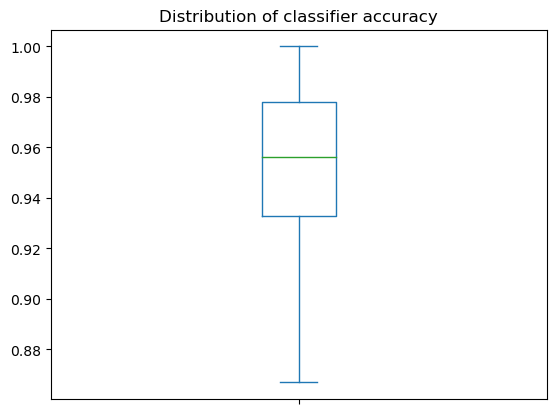

In [20]:
accuracy_scores = []
for _ in range(100):

# At each iteration we freshly split our 

    df_train, df_test = train_test_split(df, test_size=0.3) 
    x_train = df_train[data.feature_names] 
    x_test = df_test[data.feature_names]

    y_train = df_train['target'] 
    y_test = df_test['target'] # We then create a new classifier 
    
    clf = DecisionTreeClassifier() # And use it for training and prediction 
    clf.fit(x_train, y_train) 
    y_pred = clf.predict(x_test)

# Finally, we append the score to our list 
    accuracy_scores.append(round(accuracy_score(y_test, y_pred), 3))

# Better convert accuracy_scores from a list into a series # Pandas series provides statistical methods to use later 

accuracy_scores = pd.Series(accuracy_scores)
accuracy_scores.plot( title='Distribution of classifier accuracy', kind='box', )

print( 'Average Score: {:.3} [5th percentile: {:.3} & 95th percentile: {:.3}]'.format( accuracy_scores.mean(), accuracy_scores.quantile(.05), accuracy_scores.quantile(.95),) )

In [21]:
from sklearn.model_selection import ShuffleSplit

In [22]:
accuracy_scores2 = []
rs = ShuffleSplit(n_splits=100, test_size=0.3)

In [23]:
for train_index, test_index in rs.split(df):

    x_train = df.loc[train_index,data.feature_names]
    x_test = df.loc[test_index,data.feature_names]

    y_train = df.loc[train_index,'target']
    y_test = df.loc[test_index,'target']

    clf = DecisionTreeClassifier()
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)

    accuracy_scores2.append(round(accuracy_score(y_test, y_pred), 3))

accuracy_scores2 = pd.Series(accuracy_scores2)

In [24]:
from sklearn.model_selection import cross_validate

In [25]:
clf = DecisionTreeClassifier()
rs = ShuffleSplit(n_splits=100, test_size=.3)

x = df[data.feature_names]
y = df["target"]

cv_results = cross_validate(clf,x,y,cv=rs, scoring='accuracy')

acc = pd.Series(cv_results['test_score'])

In [26]:
acc

0     0.977778
1     0.955556
2     0.911111
3     0.955556
4     0.955556
        ...   
95    0.977778
96    0.911111
97    0.977778
98    0.866667
99    0.977778
Length: 100, dtype: float64

# Testing Different Tree Depths

In [27]:
run_train, run_test = train_test_split(df,test_size=.25)

x_train = df_train[data.feature_names]
x_test = df_test[data.feature_names]

y_train = df_train['target']
y_test = df_test['target']

for max_depth in [1,2,3,4]:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    rs = ShuffleSplit(n_splits=20, test_size=.25)
    cv_results = cross_validate(clf,x_train,y_train,cv=rs, scoring='accuracy')

    print('@ max_depth = {}: accuracy_scores: {}~{}'.format(
        max_depth, 
        accuracy_scores.quantile(.1).round(3), 
        accuracy_scores.quantile(.9).round(3)))

@ max_depth = 1: accuracy_scores: 0.911~0.978
@ max_depth = 2: accuracy_scores: 0.911~0.978
@ max_depth = 3: accuracy_scores: 0.911~0.978
@ max_depth = 4: accuracy_scores: 0.911~0.978


In [28]:
final_train, final_test = train_test_split(df,test_size=.4)

x_train = final_train[data.feature_names]
x_test = final_test[data.feature_names]

y_train = final_train.target
y_test = final_test.target

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train,y_train)
final_pred = clf.predict(x_test)

accuracy_score(y_test,final_pred)


0.9

# Displaying Decision Tree

In [29]:
print(export_text(clf,feature_names=data.feature_names,spacing=3,decimals=1))

|--- petal length (cm) <= 2.4
|   |--- class: 0
|--- petal length (cm) >  2.4
|   |--- petal width (cm) <= 1.8
|   |   |--- sepal length (cm) <= 5.0
|   |   |   |--- class: 2
|   |   |--- sepal length (cm) >  5.0
|   |   |   |--- class: 1
|   |--- petal width (cm) >  1.8
|   |   |--- class: 2



# Visualizing Boundaries

In [30]:
import matplotlib.pyplot as plt
def plot_decision_boundaries(clf,x,y):

    feature_names = x.columns
    x,y = x.values,y.values

    x_min, x_max = x[:,0].min(), x[:,0].max() 
    y_min, y_max = x[:,1].min(), x[:,1].max()

    step = .02

    xx, yy = np.meshgrid(np.arange(x_min,x_max, step),
        np.arange(y_min,y_max, step))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(12,8)) 
    plt.contourf(xx, yy, Z, cmap='Paired_r', alpha=0.25) 
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7) 
    plt.scatter(x[:,0], x[:,1], c=y, edgecolors='k') 
    plt.title("Tree's Decision Boundaries") 
    plt.xlabel(feature_names[0]) 
    plt.ylabel(feature_names[1])



/Users/stephenkullman/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


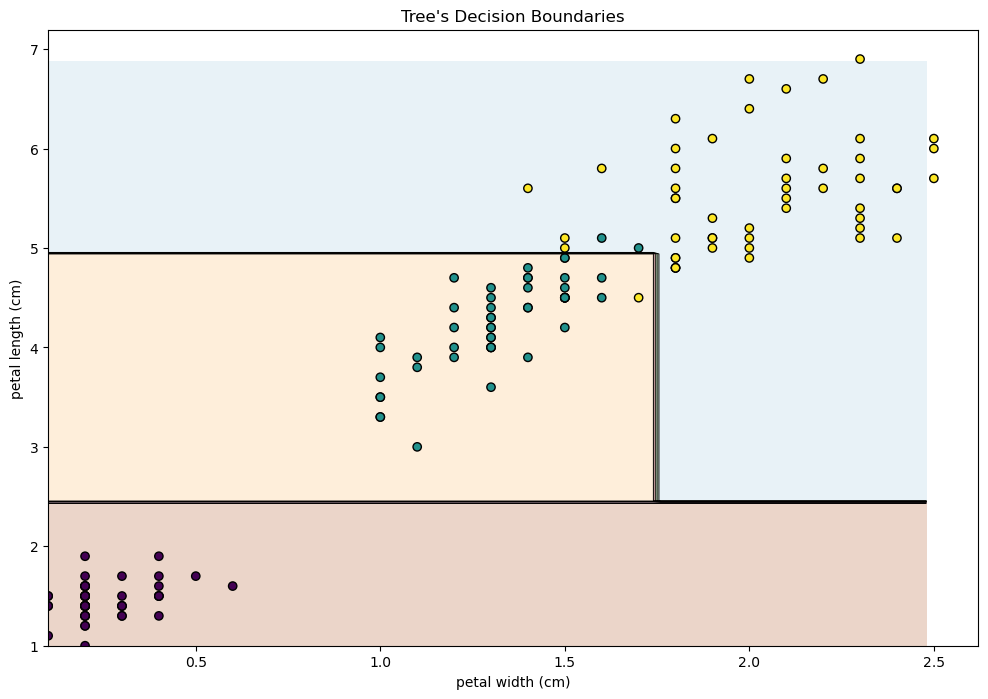

In [31]:
x = df[['petal width (cm)', 'petal length (cm)']] 
y = df['target']

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x,y)

plot_decision_boundaries(clf,x,y)

# Feature Engineering

Can we derive new features that will perform better?

In [32]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [33]:
df['petal_area'] = df['petal length (cm)'] * df['petal width (cm)']

In [34]:
df['sepal_area'] = df['sepal length (cm)'] * df['sepal width (cm)']

/var/folders/l9/qjwh76rx6wjbn8s0p0_2hd9w0000gp/T/ipykernel_54388/3851550482.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


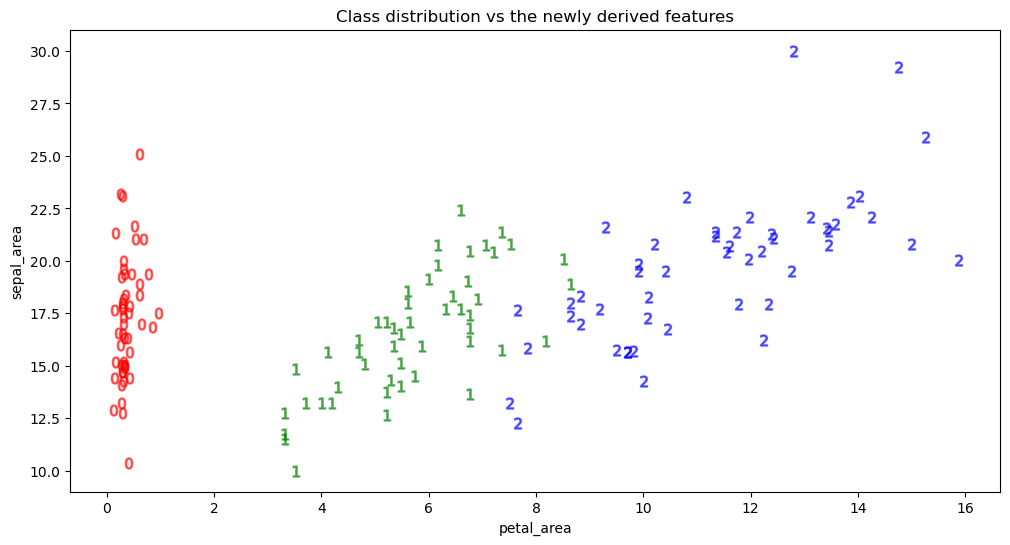

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

h_label = 'petal_area' 
v_label = 'sepal_area'

for c in df['target'].value_counts().index.tolist():
    df[df['target'] == c].plot( title='Class distribution vs the newly derived features', kind='scatter', 
                               x=h_label, 
                               y=v_label, 
                               color=['r', 'g', 'b'][c], # Each class different color 
                               marker=f'${c}$', # Use class id as marker 
                               s=64, 
                               alpha=0.5, 
                               ax=ax,

)

fig.show()

In [36]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,petal_area,sepal_area
0,5.1,3.5,1.4,0.2,0,0.28,17.85
1,4.9,3.0,1.4,0.2,0,0.28,14.70
2,4.7,3.2,1.3,0.2,0,0.26,15.04
3,4.6,3.1,1.5,0.2,0,0.30,14.26
4,5.0,3.6,1.4,0.2,0,0.28,18.00


# Testing Derived vs Original Features

In [37]:
iris['petal_area'] = iris['petalwidth'] * iris['petallength']
iris['sepal_area'] = iris['sepalwidth'] * iris['sepallength']

In [38]:
old_feat = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']
new_feat = ['petal_area','sepal_area']

In [39]:
old_feat

['sepallength', 'sepalwidth', 'petallength', 'petalwidth']

In [40]:
accuracy_old = []
accuracy_new = []

In [41]:
for _ in range(500):

    iris_train, iris_test = train_test_split(iris, test_size=0.3) 
    x_train_old = iris_train[old_feat] 
    x_test_old = iris_test[old_feat]

    x_train_new = iris_train[new_feat]
    x_test_new = iris_test[new_feat]

    y_train_ = iris_train['class'] 
    y_test_ = iris_test['class']

    clf_old = DecisionTreeClassifier()
    clf_old.fit(x_train_old, y_train_) 
    y_pred_old = clf_old.predict(x_test_old)

    accuracy_old.append(round(accuracy_score(y_test_,y_pred_old),3))

    clf_new = DecisionTreeClassifier()
    clf_new.fit(x_train_new,y_train_)
    y_pred_new = clf_new.predict(x_test_new)

    accuracy_new.append(round(accuracy_score(y_test_,y_pred_new),3))

We plot the two accuracy score lists and see that the new features are, on average, more accurate at predicting

<Axes: title={'center': 'distribution of classifier accuracy of new features'}>

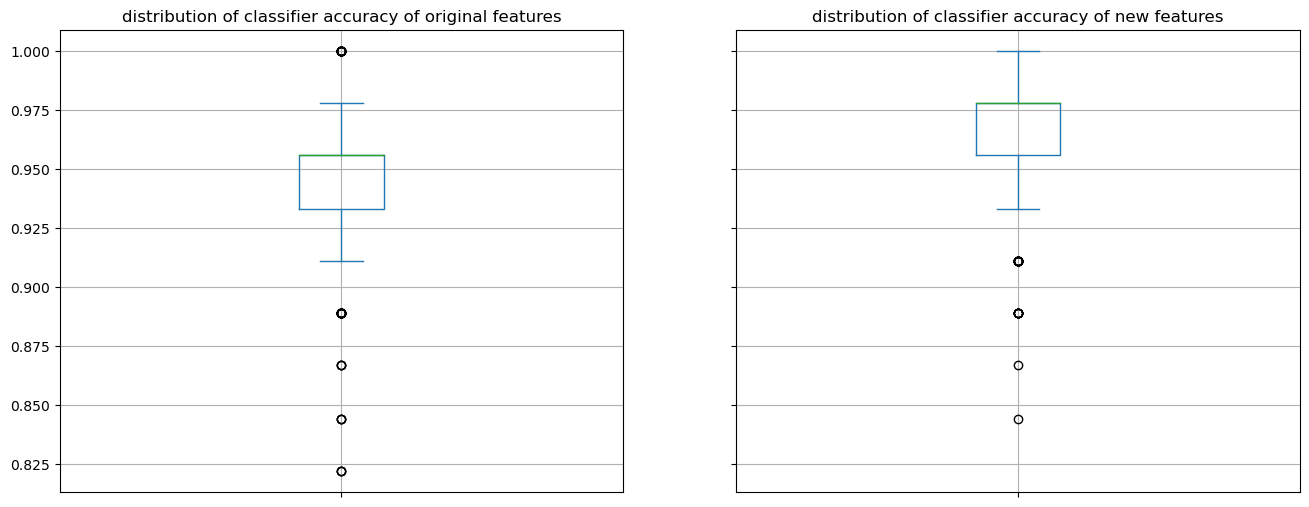

In [45]:
accuracy_old = pd.Series(accuracy_old) 
accuracy_new = pd.Series(accuracy_new)

fix, axs = plt.subplots(1,2,figsize=(16,6), sharey=True)

accuracy_old.plot(
    title='distribution of classifier accuracy of original features',
    kind= 'box',
    grid=True,
    ax=axs[0]

)

accuracy_new.plot(
    title='distribution of classifier accuracy of new features',
    kind= 'box',
    grid=True,
    ax=axs[1]

)

We see the derived features have a higher accuracy. The two main decisions to make when using decision trees are how we split teh data set and how we limit the tree